# Q1 

__Page1__

In [64]:
from bs4 import BeautifulSoup
import requests, time
import pandas as pd
from random import randint

urllist = [
    #page 1 -- 17 products
    'https://www.bestbuy.com/site/lg-48-class-b4-series-oled-4k-uhd-smart-webos-tv-2024/6584787.p?skuId=6584787',
    'https://www.bestbuy.com/site/samsung-65-class-s85d-series-oled-4k-smart-tizen-tv-2024/6578059.p?skuId=6578059',
    'https://www.bestbuy.com/site/combo/all-flat-screen-tvs/5ab770a9-7685-475d-a675-325690024d3f',
    'https://www.bestbuy.com/site/combo/all-flat-screen-tvs/3d713148-5c0b-4699-a1fc-42f9ddc4ea68',
    'https://www.bestbuy.com/site/combo/all-flat-screen-tvs/982dedc2-6fcc-4220-8385-4ab0e80b099f',
    'https://www.bestbuy.com/site/combo/all-flat-screen-tvs/623bbc07-a71d-46cc-8dfc-9399d647338a',
    'https://www.bestbuy.com/site/combo/all-flat-screen-tvs/1a91d565-713a-49c4-bc9f-d882f314abe5',
    'https://www.bestbuy.com/site/combo/all-flat-screen-tvs/3eda1286-d89d-49ac-848a-8cff27acb174',
    'https://www.bestbuy.com/site/lg-65-class-c4-series-oled-evo-4k-uhd-smart-webos-tv-2024/6578042.p?skuId=6578042',
    'https://www.bestbuy.com/site/sony-65-class-bravia-8-oled-4k-uhd-smart-google-tv-2024/6578577.p?skuId=6578577',
    'https://www.bestbuy.com/site/combo/all-flat-screen-tvs/73674ae8-4cee-4eee-915f-46cc386c224d',
    'https://www.bestbuy.com/site/combo/all-flat-screen-tvs/1fbec076-45ec-4e3d-a3ba-178445ef39f4',
    'https://www.bestbuy.com/site/combo/all-flat-screen-tvs/5e26aa90-2572-469b-a1a5-598ff80500b8',
    'https://www.bestbuy.com/site/combo/all-flat-screen-tvs/8f7e04a0-d82c-476a-94d8-9ec47a0e2de7',
    'https://www.bestbuy.com/site/combo/all-flat-screen-tvs/0010be2f-b474-4bf8-9f85-33074fd114fd', 
    'https://www.bestbuy.com/site/combo/all-flat-screen-tvs/795f078f-de95-4472-bbe2-9a1e2ce80d42',
    'https://www.bestbuy.com/site/lg-65-class-b4-series-oled-4k-uhd-smart-webos-tv-2024/6578053.p?skuId=6578053'
]

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}

output = {
    "Title": [],
    "AverageReviewScore": [],
    "NumberOfReviews": [],
    "Images": [],
    "Highlights": [],
    "Price": [],
    "Savings": [],
    "MonthlyPayment": []
}

for url in urllist:
    time.sleep(randint(5, 10))
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'lxml')

    # Title
    try:
        title = soup.find('h1').get_text(strip=True)
    except:
        title = ""
    
    # Average Review Score
    try:
        score_span = soup.select_one('span.ugc-c-review-average.font-weight-medium.order-1')
        averagereviewscore = score_span.get_text(strip=True) if score_span else ""
    except:
        averagereviewscore = ""

    
    # Number of Reviews
    try:
        review_count = soup.select_one('span.c-reviews.order-2')
        numberofreviews = review_count.get_text(strip=True).replace('(', '').replace(')', '') if review_count else ""
    except:
        numberofreviews = ""

    # Images
    try:
        images = soup.find_all('img')
        image_urls = [img['src'] for img in images if 'src' in img.attrs and '/images/' in img['src']]
    except:
        image_urls = []

    # Highlights
    try:
        highlights = soup.find('div', class_='mb-200').get_text(strip=True).replace("Highlights", '')
    except:
        highlights = ""

    # Price
    try:
        soup_string = str(soup)
        price = soup_string[soup_string.find('"customerPrice":'):]
        price = price.replace('"customerPrice":', '').split(',')[0]
    except:
        price = ""

    # Savings
    try:
        savings = soup_string[soup_string.find('"totalSavings":'):]
        savings = savings.replace('"totalSavings":', '').split(',')[0]
    except:
        savings = ""

    # Monthly Payment
    try:
        class_options = [
            'suggested-monthly-payment_monthly-payment_large-price',
            'suggested-monthly-payment_monthly-payment',
            'monthly-payment',
            'total-cost-clarity-content__monthly-payment'
        ]
        monthly = "0"
        for cls in class_options:
            monthly_div = soup.find('div', class_=cls)
            if monthly_div and monthly_div.find('strong'):
                value = monthly_div.find('strong').get_text(strip=True)
                monthly = value.replace('$', '')
                break
    except:
        monthly = "0"

    # Store to output
    output['Title'].append(title)
    output['AverageReviewScore'].append(averagereviewscore)
    output['NumberOfReviews'].append(numberofreviews)
    output['Images'].append(image_urls)
    output['Highlights'].append(highlights)
    output['Price'].append(price)
    output['Savings'].append(savings)
    output['MonthlyPayment'].append(monthly)

# Save to CSV
results = pd.DataFrame(output)
results.to_csv('BestBuy_Products1.csv', index=True, index_label="Index")
print("Saved", len(results), "products.")


Saved 17 products.


__PAGE 2__

In [76]:
from bs4 import BeautifulSoup
import requests, time
import pandas as pd
from random import randint

urllist = [
    #page 2 -- 18 products
    'https://www.bestbuy.com/site/samsung-65-class-qn70f-series-neo-qled-mini-led-4k-uhd-samsungvision-ai-smart-tizen-tv-2025/6614343.p?skuId=6614343',
    'https://www.bestbuy.com/site/samsung-77-class-s95d-series-oled-4k-glare-free-smart-tizen-tv-2024/6576555.p?skuId=6576555',
    'https://www.bestbuy.com/site/samsung-77-class-s84d-series-4k-oled-smart-tizen-tv/6595650.p?skuId=6595650',
    'https://www.bestbuy.com/site/samsung-50-class-qn90d-series-neo-qled-4k-mini-led-smart-tizen-tv-2024/6576431.p?skuId=6576431', 
    'https://www.bestbuy.com/site/samsung-77-class-s85f-series-oled-4k-uhd-samsungvision-ai-smart-tizen-tv-2025/6613452.p?skuId=6613452',
    'https://www.bestbuy.com/site/lg-55-class-g4-series-oled-evo-4k-uhd-smart-webos-tv-2024/6578049.p?skuId=6578049',
    'https://www.bestbuy.com/site/lg-55-class-g4-series-oled-evo-4k-uhd-smart-webos-tv-2024/6578049.p?skuId=6578049',
    'https://www.bestbuy.com/site/lg-75-class-85a-series-qned-evo-ai-miniled-4k-uhd-smart-webos-tv-2025/6621816.p?skuId=6621816',
    'https://www.bestbuy.com/site/awol-vision-alr-c-100-100-ambient-light-rejection-alr-cinematic-fixed-frame-ultra-short-throw-ust-projector-screen4k-8k-3d-gray/6516303.p?skuId=6516303',
    'https://www.bestbuy.com/site/lg-77-class-g4-series-oled-evo-4k-uhd-smart-webos-tv-with-one-wall-design-2024/6578047.p?skuId=6578047',  
    'https://www.bestbuy.com/site/lg-77-class-c4-series-oled-evo-4k-uhd-smart-webos-tv-2024/6578044.p?skuId=6578044',
    'https://www.bestbuy.com/site/sony-55-class-bravia-xr-a75l-oled-4k-uhd-smart-google-tv-2023/6559234.p?skuId=6559234',
    'https://www.bestbuy.com/site/sony-65-class-bravia-8-ii-oled-4k-uhd-smart-google-tv-2025/6626032.p?skuId=6626032',
    'https://www.bestbuy.com/site/sony-55-class-bravia-8-oled-4k-uhd-smart-google-tv-2024/6578569.p?skuId=6578569',
    'https://www.bestbuy.com/site/ethereal-helios-8-outlet-3240-joules-surge-protector-black-brushed-aluminum/6580807.p?skuId=6580807', 
    'https://www.bestbuy.com/site/samsung-slim-fit-wall-mount-black/6561049.p?skuId=6561049',
    'https://www.bestbuy.com/site/ethereal-helios-12-outlet-2-usb-unlimited-joules-surge-protector-black-brushed-aluminum/6580822.p?skuId=6580822'
]

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}

output = {
    "Title": [],
    "AverageReviewScore": [],
    "NumberOfReviews": [],
    "Images": [],
    "Highlights": [],
    "Price": [],
    "Savings": [],
    "MonthlyPayment": []
}

for url in urllist:
    time.sleep(randint(5, 10))
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'lxml')

    # Title
    try:
        title = soup.find('h1').get_text(strip=True)
    except:
        title = ""

    
 #you need to update this scoring because there are two different score show in CSS   
    
    # Average Review Score
    try:
        score_span = soup.select_one('span.ugc-c-review-average.font-weight-medium.order-1')
        averagereviewscore = score_span.get_text(strip=True) if score_span else ""
    except:
        averagereviewscore = ""




    
    # Number of Reviews
    try:
        review_count = soup.find('span', class_='c-total-reviews')
        numberofreviews = review_count.get_text(strip=True).replace('(', '').replace(')', '') if review_count else ""
    except:
        numberofreviews = ""

    # Images
    try:
        images = soup.find_all('img')
        image_urls = [img['src'] for img in images if 'src' in img.attrs and '/images/' in img['src']]
    except:
        image_urls = []

    # Highlights
    try:
        highlights = soup.find('div', class_='mb-200').get_text(strip=True).replace("Highlights", '')
    except:
        highlights = ""

    # Price
    try:
        soup_string = str(soup)
        price = soup_string[soup_string.find('"customerPrice":'):]
        price = price.replace('"customerPrice":', '').split(',')[0]
    except:
        price = ""

    # Savings
    try:
        savings = soup_string[soup_string.find('"totalSavings":'):]
        savings = savings.replace('"totalSavings":', '').split(',')[0]
    except:
        savings = ""

    # Monthly Payment
    try:
        class_options = [
            'suggested-monthly-payment_monthly-payment_large-price',
            'suggested-monthly-payment_monthly-payment',
            'monthly-payment',
            'total-cost-clarity-content__monthly-payment'
        ]
        monthly = "0"
        for cls in class_options:
            monthly_div = soup.find('div', class_=cls)
            if monthly_div and monthly_div.find('strong'):
                value = monthly_div.find('strong').get_text(strip=True)
                monthly = value.replace('$', '')
                break
    except:
        monthly = "0"

    # Store to output
    output['Title'].append(title)
    output['AverageReviewScore'].append(averagereviewscore)
    output['NumberOfReviews'].append(numberofreviews)
    output['Images'].append(image_urls)
    output['Highlights'].append(highlights)
    output['Price'].append(price)
    output['Savings'].append(savings)
    output['MonthlyPayment'].append(monthly)

# Save to CSV
results = pd.DataFrame(output)
results.to_csv('BestBuy_Products2.csv', index=True, index_label="Index")
print("Saved", len(results), "products.")

Saved 17 products.


### Non-Coding Approach

__Page 3__ Scraped by APIFY - "BestBuy products  actor". 

__Merging Datasets__

In [96]:
import pandas as pd

# Read CSVs
df1 = pd.read_csv('BestBuy_Products1.csv')
df2 = pd.read_csv('BestBuy_Products2.csv')
df3 = pd.read_csv('Bestbuy_APIFY_P3.csv', encoding='ISO-8859-1', on_bad_lines='skip')

# Merge
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

merged_df.index = merged_df.index + 1
merged_df.reset_index(inplace=True)
merged_df.rename(columns={'index': 'IndexTotal'}, inplace=True)

# Save to new file
merged_df.to_csv('BestBuy_ProductsTotal.csv', index=False)

print("Done.")


Done.


# Q2 Pearson Correlation & VIF

In [49]:
import pandas
import numpy
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import input data
input_dataframe=pandas.read_csv("BestBuy_ProductsTotal.csv")


independent_variables = input_dataframe[['AverageReviewScore','NumberOfReviews','Price','MonthlyPayment']]


#Calculate the correlations among all columns from the CSV fil e
#High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
#Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
#Low degree: When the value lies below + .29, then it is said to be a small correlation.

print("Correlations Among Columns in the Dataset")
print(independent_variables.corr(method ='pearson'))
print("\n")


# VIF dataframe
vif_data = pandas.DataFrame()
vif_data["Independent Variavle"] = independent_variables.columns
# calculating VIF for each feature
#A VIF above 5 or 10 is often considered problematic, indicating that multicollinearity
vif_data["Variance Inflation Score"] = [variance_inflation_factor(independent_variables.values,
i)
for i in range(len(independent_variables.columns))]
print(vif_data)

Correlations Among Columns in the Dataset
                    AverageReviewScore  NumberOfReviews     Price  \
AverageReviewScore            1.000000         0.159580  0.057586   
NumberOfReviews               0.159580         1.000000  0.103510   
Price                         0.057586         0.103510  1.000000   
MonthlyPayment               -0.047793         0.085714  0.881346   

                    MonthlyPayment  
AverageReviewScore       -0.047793  
NumberOfReviews           0.085714  
Price                     0.881346  
MonthlyPayment            1.000000  


  Independent Variavle  Variance Inflation Score
0   AverageReviewScore                  5.868899
1      NumberOfReviews                  1.550227
2                Price                 31.874317
3       MonthlyPayment                 28.166272


__Results__

- The Pearson correlation values show that price and monthly payment have a strong positive relationship (0.88)that shows they move together.
- VIF values also confirm that price (31.87) and monthly payment (28.17) are highly collinear, which means they are not independent. For a better model, we should remove one of them.
- AverageReviewScore and NumberOfReviews have very low correlation with other variables (all below 0.2), so they are mostly independent.Their VIF scores are also low (5.87 and 1.55), which means there’s no multicollinearity problem for those two.

# Q3 - Lasso Regression

In [53]:
import pandas
import numpy
from sklearn.model_selection import train_test_split

#import input data
input_dataframe=pandas.read_csv("BestBuy_ProductsTotal.csv")


#Scikit-Learn's linear regression model expects a 2 dimensional array inputs. But, based on our dataset, we have a 1 dimensional array for independent and dependent variables.
#The purpose of reshape below is to convert 1 dimensional scores and hours array values to 2 2-dimensional arrays.

dependent_variable_array = input_dataframe['Savings'].values.reshape(-1, 1)

#Without this, you will get a warning message in the output
dependent_variable_array = numpy.squeeze(dependent_variable_array)

#We create an array below that contains three independent variables, features, or columns from the csv file
independent_variable_array = input_dataframe[['AverageReviewScore','NumberOfReviews','Price','MonthlyPayment']].values

#Split the data into train and test sets
dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LassoCV

# Lasso with 2 fold cross-validation
mymodel = LassoCV(cv=2, random_state=0, max_iter=10000)

# Load Training data to the model

mymodel.fit(independent_variable_train,dependent_variable_train)

#display alpha that produced the lowest test MSE
print("Alpha that produces lowest MSE:", mymodel.alpha_)


#This prints the a value in the y=ax+b model
print("a value:", mymodel.intercept_)
#This prints the a value in the y=ax+b
print("b values:", mymodel.coef_)
print("\n")


predicted_saving = mymodel.predict([[2, 1000, 1200, 80]])
print("Predicted Saving:", predicted_saving) 
print("\n")

#Make predictions based on test data which we have not used yet
predicted_savings = mymodel.predict(independent_variable_test)

#Compare actual scores with the predicted scores within the dataset
#Numpy's Squeze method removes single-dimensional entries from the shape of an array.
predictions_dataframe = pandas.DataFrame([{'Real Savings': dependent_variable_test.squeeze(), 'Predicted Savings': predicted_savings.squeeze()}])
print(predictions_dataframe)


#Evaluate the model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

#These are model evaluation metrics used with regression models
#This is the r squared metric which we calculated in excel
r_squared = r2_score(dependent_variable_test, predicted_savings)


#mean absolute error gives the mean of absolute difference between model prediction and target value
# E.g., MAE=10 implies that, on average, the forecast's distance from the true value is 10
meanabsoluteerror = mean_absolute_error(dependent_variable_test, predicted_savings)

#Average of the square of the difference between actual and estimated values
#This value will always be positive. The lower the value, the better is our model
meansquarederror = mean_squared_error(dependent_variable_test, predicted_savings)

#This is the standard deviation of the prediction errors
#Based on a rule of thumb, it can be said that values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.
#This value can be greater than 1. Lower values indicate a better fit of a model.
rootmeansquarederror = numpy.sqrt(meansquarederror)

print("\n")
print(f'R Squared Value: {r_squared:.2f}')
print(f'Mean absolute error: {meanabsoluteerror:.2f}')
print(f'Mean squared error: {meansquarederror:.2f}')
print(f'Root mean squared error: {rootmeansquarederror:.2f}')


Alpha that produces lowest MSE: 185.31063524874517
a value: 45.36981735665421
b values: [-0.         -0.15161552  0.14626217  1.38400028]


Predicted Saving: [179.98892412]


                                        Real Savings  \
0  [200, 1000, 100, 500, 300, 200, 100, 300, 400,...   

                                   Predicted Savings  
0  [289.91751828747226, 579.6121928983205, 202.32...  


R Squared Value: 0.26
Mean absolute error: 170.89
Mean squared error: 58352.32
Root mean squared error: 241.56


__Results__
- The model found some relationship between the features and savings, but it is not very strong.
- The R-squared is 0.26, which means the model explains 26% of the variation in savings.
- Mean Absolute Error (MAE) is about 170.89, showing that predictions are off by around $171 on average.
- Root Mean Squared Error (RMSE) is 241.56, which suggests larger errors still exist in some predictions.
- Lasso helped reduce the impact of irrelevant features and slightly improved interpretability, but accuracy is still limited

# Q4 - Decision Tree

Predicted Target (Savings): [400.]

Evaluation Metrics:
R Squared Value: -0.09
Mean Absolute Error: 230.77
Mean Squared Error: 86153.85
Root Mean Squared Error: 293.52


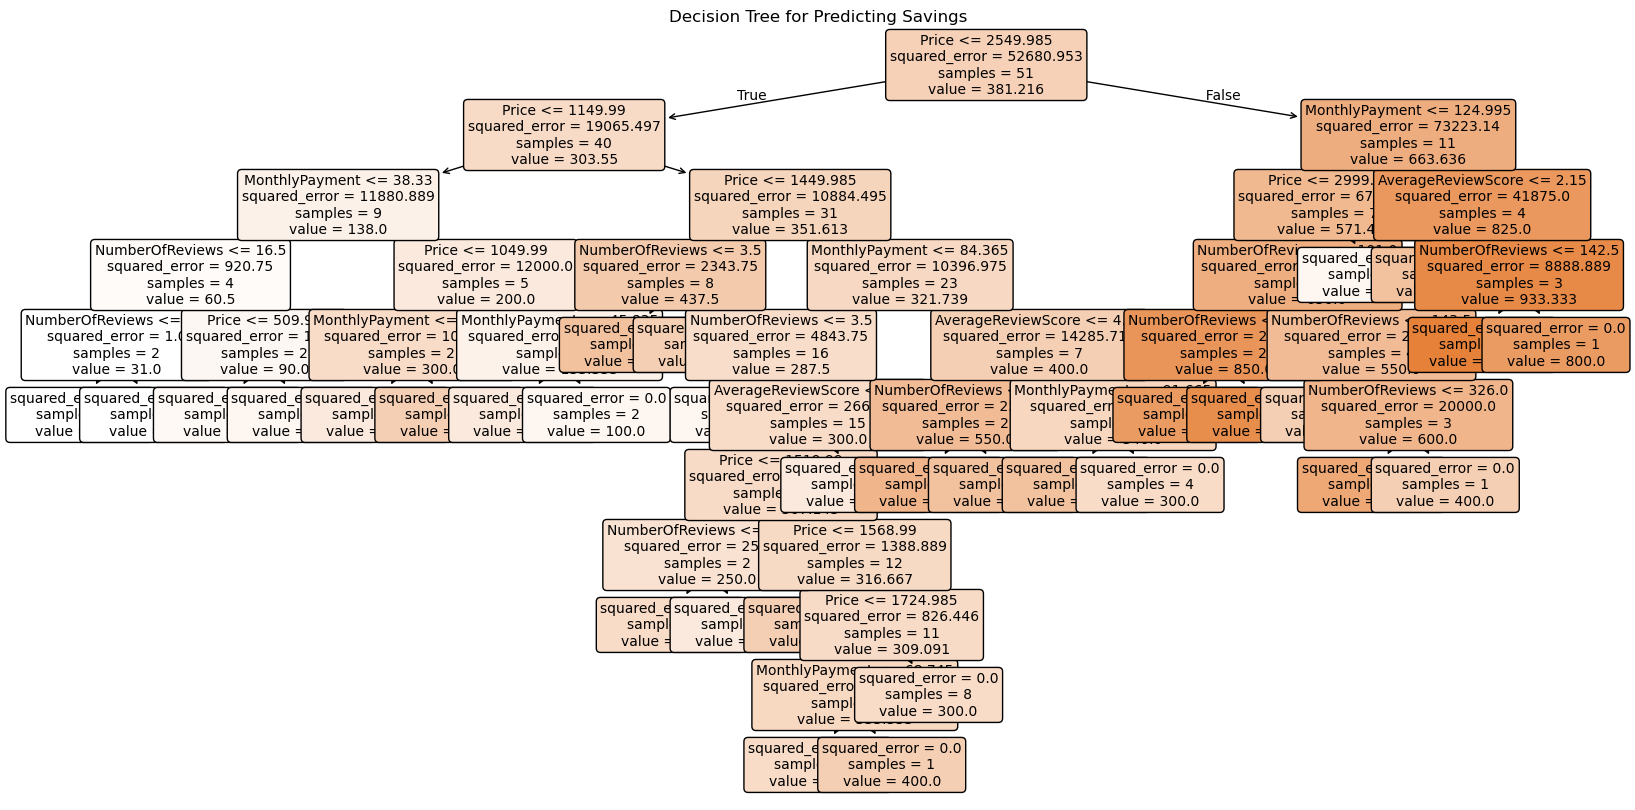

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load data
input_dataframe=pandas.read_csv("BestBuy_ProductsTotal.csv")

# Define dependent and independent variables
dependent_variable_array = input_dataframe['Savings'].values.reshape(-1, 1)
independent_variable_array = input_dataframe[[ 'AverageReviewScore', 'NumberOfReviews', 'Price', 'MonthlyPayment']].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(independent_variable_array, dependent_variable_array, test_size=0.2, random_state=42)

# Train decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on example input
example_input = np.array([2, 1000, 1200, 80])  
predicted_target = model.predict([example_input])
print("Predicted Target (Savings):", predicted_target)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nEvaluation Metrics:")
print(f'R Squared Value: {r_squared:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=['AverageReviewScore', 'NumberOfReviews', 'Price', 'MonthlyPayment'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree for Predicting Savings")
plt.show()


__Results__
- R² is -0.09. The model performs poorly and fails to explain the variance in savings
- MAE = 230.77 and RMSE = 293.52 indicate higher errors, showing that the model’s predictions are not very accurate.
- The first split is on Price ≤ 2549.99 is in root node (top decision) which suggests price is the most important feature in determining savings.
- Monthly payment, number of reviews, and review score to make more specific savings predictions after price.
- At each step, it splits the data into smaller groups to guess how much the savings might be.

# Q5 - Random Forest

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load data
input_dataframe = pd.read_csv("BestBuy_ProductsTotal.csv")

# Dependent variable
dependent_variable_array = input_dataframe['Savings'].values.reshape(-1, 1)


# Create independent variable array
independent_variable_array = input_dataframe[['AverageReviewScore','NumberOfReviews','Price','MonthlyPayment']].values


# Split data
dependent_variable_train, dependent_variable_test, independent_variable_train, independent_variable_test = train_test_split(
    dependent_variable_array, independent_variable_array, test_size=0.2, random_state=42)

# Random forest with grid search
basemodel = RandomForestRegressor(random_state=42)
parameters = {'n_estimators': [15, 50, 75, 100, 125, 150, 300]}
grid_model = GridSearchCV(basemodel, parameters, cv=2)
optimizedmodel = grid_model.fit(independent_variable_train, dependent_variable_train.ravel())

# Show validation results
validationresults = pd.DataFrame(grid_model.cv_results_)
print("Validation Results:\n", validationresults)

print("Best Parameters:", optimizedmodel.best_params_)

# Prediction for custom input (now 5 variables)
prediction_inputdata = np.array([2, 1000, 1200, 150])
predicted_target = optimizedmodel.predict([prediction_inputdata])
print("Predicted Target: $", predicted_target)

# Test predictions
y_pred = optimizedmodel.predict(independent_variable_test)

# Evaluation
r_squared = r2_score(dependent_variable_test, y_pred)
mae = mean_absolute_error(dependent_variable_test, y_pred)
mse = mean_squared_error(dependent_variable_test, y_pred)
rmse = np.sqrt(mse)

print(f'\nR Squared Value: {r_squared:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


Validation Results:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.056264      0.008563         0.002113        0.002113   
1       0.133196      0.001470         0.012232        0.003858   
2       0.182441      0.009946         0.015890        0.000189   
3       0.251524      0.003002         0.027077        0.012099   
4       0.343917      0.009923         0.024267        0.007850   
5       0.382717      0.016812         0.026983        0.004879   
6       0.826496      0.012205         0.042586        0.002437   

   param_n_estimators                 params  split0_test_score  \
0                  15   {'n_estimators': 15}           0.171687   
1                  50   {'n_estimators': 50}           0.304053   
2                  75   {'n_estimators': 75}           0.306754   
3                 100  {'n_estimators': 100}           0.303121   
4                 125  {'n_estimators': 125}           0.303320   
5                 150  {'n_estimators': 

__Results__
- This model gave an R² value of 0.28, which means it explains only %28  of the variation in savings.
- The best result came from using 50 decision trees, giving the lowest error compared to other options.
- The Mean Squared Error (MSE) is 56,774.41, and the Root Mean Squared Error (RMSE) is 238.27, which penalizes larger errors more due to squaring..

# Q6 - SVM

In [66]:
import numpy
import pandas

# Load data
input_dataframe = pd.read_csv("BestBuy_ProductsTotal.csv")



#We create an array below that contains the dependent variable we want to predict
dependent_variable_array = input_dataframe['Savings'].values.reshape(-1, 1)
 
#We create an array below that contains all independent variables, features, or columns from the csv file
independent_variable_array = input_dataframe[['AverageReviewScore','NumberOfReviews','Price','MonthlyPayment']].values


# Split dataset into training set and test set
# Import train_test_split function
from sklearn.model_selection import train_test_split 
# 80% training and 20% test
dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)


# Split dataset into training set and test set
# Import train_test_split function
from sklearn.model_selection import train_test_split 
# 80% training and 20% test
dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)


#Create a model
from sklearn.svm import SVR
mymodel = SVR(kernel = 'rbf')
mymodel.fit(independent_variable_train,dependent_variable_train.ravel())

#Predict the response for test dataset
y_pred = mymodel.predict(independent_variable_test)

from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

r_squared = r2_score(dependent_variable_test, y_pred)

#mean absolute error gives the mean of absolute difference between model prediction and target value
# E.g., MAE=10 implies that, on average, the forecast's distance from the true value is 10
meanabsoluteerror = metrics.mean_absolute_error(dependent_variable_test, y_pred)

#Average of the square of the difference between actual and estimated values
#This value will always be positive. The lower the value, the better is our model
meansquarederror = metrics.mean_squared_error(dependent_variable_test, y_pred)

rootmeansquarederror = numpy.sqrt(meansquarederror)

print("\n")
print(f'R Squared Value: {r_squared:.2f}')
print(f'Mean absolute error: {meanabsoluteerror:.2f}')
print(f'Mean squared error: {meansquarederror:.2f}')
print(f'Root mean squared error: {rootmeansquarederror:.2f}')



R Squared Value: -0.05
Mean absolute error: 206.96
Mean squared error: 83025.23
Root mean squared error: 288.14


__Results__
 - The model performed poorly with an R² value of -0.05 means it does worse than simply predicting the average savings.
-  The high errors (MAE: 206.98, RMSE: 288.18) show that predictions are far off from actual values.
-  Results shows the SVR model with current features isn’t a good fit


# Q7 -Neural Network

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

input_dataframe = pd.read_csv("BestBuy_ProductsTotal.csv")


#Define dependent and independent variables
dependent_variable_array = input_dataframe['Savings'].values.reshape(-1, 1)
independent_variable_array = input_dataframe[['AverageReviewScore', 'NumberOfReviews', 'Price', 'MonthlyPayment']].values


dependent_variable_train, dependent_variable_test, independent_variable_train, independent_variable_test = train_test_split(
    dependent_variable_array, independent_variable_array, test_size=0.2, random_state=42
)

#Create and train a neural network model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(independent_variable_train, dependent_variable_train.ravel())

#Predict and evaluate
y_pred = nn_model.predict(independent_variable_test)
r_squared = r2_score(dependent_variable_test, y_pred)
meanabsoluteerror = mean_absolute_error(dependent_variable_test, y_pred)
meansquarederror = mean_squared_error(dependent_variable_test, y_pred)
rootmeansquarederror = np.sqrt(meansquarederror)

#Print results
print("\n")
print(f'R Squared Value: {r_squared:.2f}')
print(f'Mean absolute error: {meanabsoluteerror:.2f}')
print(f'Mean squared error: {meansquarederror:.2f}')
print(f'Root mean squared error: {rootmeansquarederror:.2f}')




R Squared Value: 0.33
Mean absolute error: 167.18
Mean squared error: 52815.36
Root mean squared error: 229.82


__Results__
-  R-squared value of 0.33, indicating it explains about 33% of the variance in the target variable. Better than other models.
- MAE (167.18) and MSE (52,815.36) suggest the model's predictions have improved accuracy and reduced large errors.
- RMSE (229.82) is lower than other models’ RMSE values, showing this model performs better overall.


# Q8  - Neural Network Line Diagram

C:\Users\ceren\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


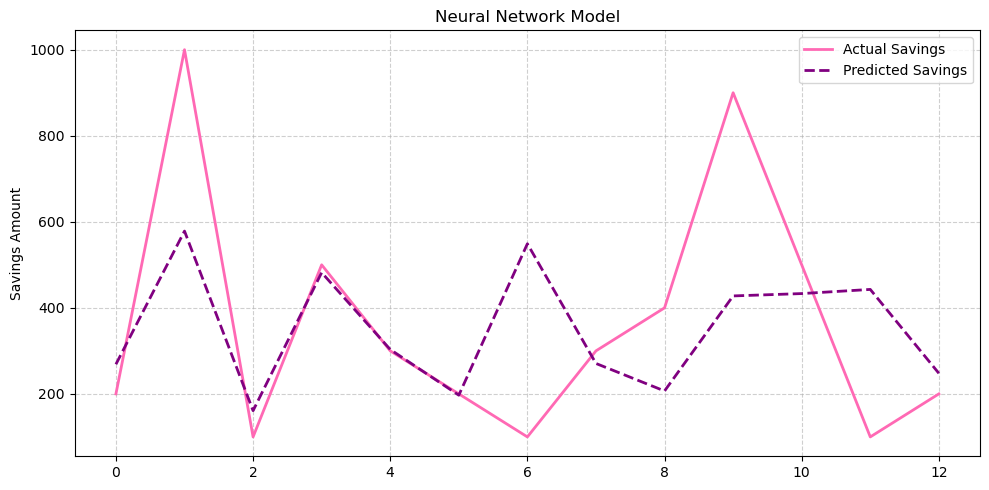

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load data
input_dataframe = pd.read_csv("BestBuy_ProductsTotal.csv")

# Convert product titles to numeric IDs
d = {ni: indi for indi, ni in enumerate(set(input_dataframe['Title']))}
input_dataframe['TitleID'] = [d[ni] for ni in input_dataframe['Title']]

# Define dependent and independent variables
dependent_variable_array = input_dataframe['Savings'].values.reshape(-1, 1)
independent_variable_array = input_dataframe[['TitleID', 'AverageReviewScore', 'NumberOfReviews', 'Price', 'MonthlyPayment']].values

# Split data
dependent_variable_train, dependent_variable_test, independent_variable_train, independent_variable_test = train_test_split(
    dependent_variable_array, independent_variable_array, test_size=0.2, random_state=42
)

# Train neural network
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(independent_variable_train, dependent_variable_train.ravel())

# Predict
y_pred = nn_model.predict(independent_variable_test)

# Plot actual vs. predicted
plt.figure(figsize=(10, 5))
plt.plot(dependent_variable_test[:50], label='Actual Savings', color='hotpink', linewidth=2)
plt.plot(y_pred[:50], label='Predicted Savings', color='purple', linestyle='--', linewidth=2)
plt.title('Neural Network Model')
plt.xlabel('')
plt.ylabel('Savings Amount')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


__Results__
- Pink line is for actual savings and the purple dashed line is for predictied savings form NN model.
- The two lines usually follow a similar pattern, which means the model is capturing the trend, but there are still noticeable gaps at some points.


# Q9

R Squared Value: 0.38
Mean Absolute Error: 187.47
Mean Squared Error: 48991.52
Root Mean Squared Error: 221.34


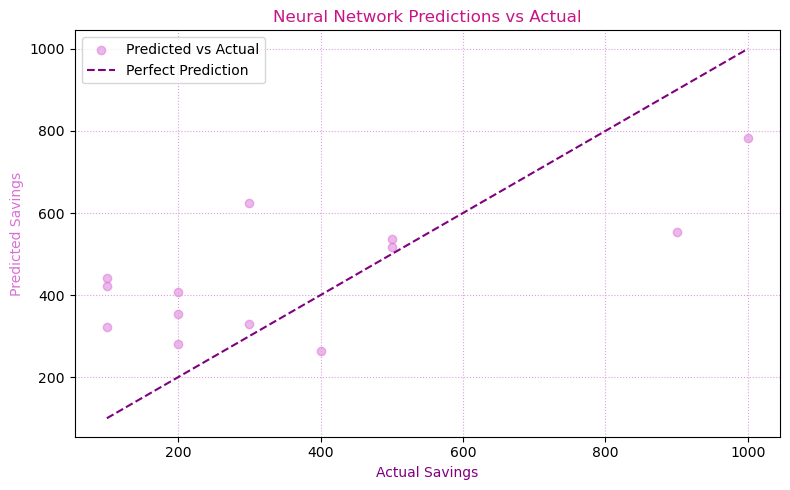

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Load data
input_dataframe = pd.read_csv("BestBuy_ProductsTotal.csv")

# Encode product titles to numeric IDs using factorize
input_dataframe['TitleID'] = pd.factorize(input_dataframe['Title'])[0]

#Define dependent and independent variables
y = input_dataframe['Savings'].values.reshape(-1, 1)
X = input_dataframe[['TitleID','AverageReviewScore','NumberOfReviews','Price','MonthlyPayment']].values


scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

#neural network model
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train, y_train.ravel())

# Predict and evaluate
y_pred_scaled = model.predict(X_test).reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test)

r2 = r2_score(y_test_orig, y_pred)
mae = mean_absolute_error(y_test_orig, y_pred)
mse = mean_squared_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)

print(f'R Squared Value: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Plot actual vs predicted with purple/pink theme
plt.figure(figsize=(8, 5))
plt.scatter(y_test_orig, y_pred, alpha=0.5, color='orchid', label='Predicted vs Actual')
plt.plot([min(y_test_orig), max(y_test_orig)], [min(y_test_orig), max(y_test_orig)], color='purple', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Savings", color='purple')
plt.ylabel("Predicted Savings", color='orchid')
plt.title("Neural Network Predictions vs Actual", color='mediumvioletred')
plt.grid(True, linestyle=':', color='plum')
plt.legend()
plt.tight_layout()
plt.show()


__Results__ 
- Better accuracy after adding TitleId. R² value increased to 0.38, showing the model now explains more of the savings variation.
- Most points are near dashed line, which means the predictions are getting closer to the actual values.
-  Using product titles as numbers (TitleID) helped the neural network better recognize patterns related to savings.